## Evaluation with plots


In [1]:
import numpy as np
from texttable import Texttable
import latextable
import matplotlib.pyplot as plt
from glob import glob

## Conceptnet evaluation

#### Hypernym relation

In [2]:
# Load the results

models = ["bert", "electra"]
kb = "cn"


precisions_models = {}
recall_models = {}
mrr_models = {}

for model in models:
    main_folder = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}'

    precisions = []
    recalls = []
    mrrs = []

    for file in glob(main_folder+'/**/*.txt'):
        print(f'File: {file}')
        
        #print(file.split("\\")[-2])
        type_relation = file.split("\\")[-2]


        with open(file, 'r', encoding="utf8") as f:
            lines = f.readlines()

            precs_text = lines[:4]
            
            prec_rel_k = []
            for line in precs_text:
                split = line.strip().split(": ")
                prec_v = round(float(split[1]), 2)
                prec_rel_k.append(prec_v)


            recalls_text = lines[6:10]

            recall_rel_k = []
            for line in recalls_text:
                split = line.strip().split(": ")
                recall_v = round(float(split[1]), 2)
                recall_rel_k.append(recall_v)

            mrr_text = lines[18] # line is mrr
            split = mrr_text.strip().split(": ")
            mrr = round(float(split[1]), 2)


        precisions.append((type_relation, prec_rel_k))

        recalls.append((type_relation, recall_rel_k))

        mrrs.append((type_relation, mrr))

    precisions_models[model] = precisions
    recall_models[model] = recalls
    mrr_models[model] = mrrs


print(precisions_models)
print(recall_models)
print(mrr_models)



File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\is_a\masked_first_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\specific_term\masked_first_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\such_as\masked_first_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/cn\is_a\masked_first_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/cn\specific_term\masked_first_concept_hyper_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/cn\such_as\masked_first_concept_hyper_20.txt
{'bert': [('is_a', [0.09, 0.15, 0.28, 0.37]), ('specific_term', [0.08, 0.17, 0.28, 0.36]), ('such_as', [0.11, 0.18, 0.3, 0.36])], 'electra': [('is_a', [0.04, 0.05, 0.16, 0.21]), ('specific_term', [0.01, 0.02, 0.07, 0.16]), ('such_as', [0.02, 0.06, 0.14, 0.23])]}
{'bert': [('is_a', [0.08, 0.14, 0.25, 0.35]), ('specific_term', [0.0

### PRECISION@K

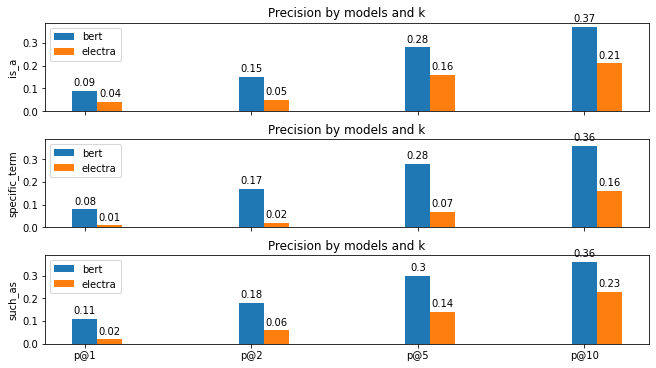

In [3]:
#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(18, 10))

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(9, 5))

width = 0.15  # the width of the bars

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

labels = ("p@1", "p@2", "p@5", "p@10") # ci sono i valori di k utilizzati

x = np.arange(len(labels))  # the label of precision

for (i, j) in enumerate([0, 1, 2]):
    

    rects1 = axes[j].bar(x, precisions_models[models[0]][i][1], width, label=models[0])
    axes[j].bar_label(rects1, padding=3)
    
    rects2 = axes[j].bar(x + width, precisions_models[models[1]][i][1], width, label=models[1])
    axes[j].bar_label(rects2, padding=3)

    #rects3 = axes[j].bar(x + 2*width, precisions_models[models[2]][i][1], width, label=models[2])
    #axes[j].bar_label(rects3, padding=3)

    #rects4 = axes[j].bar(x + 3*width, precisions_models[models[3]][i][1], width, label=models[3])
    #axes[j].bar_label(rects4, padding=3)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[j].set_ylabel(precisions_models[models[0]][i][0])
    axes[j].set_title('Precision by models and k')
    axes[j].set_xticks(x, labels)
    axes[j].legend()


plt.show()

### RECALL@K

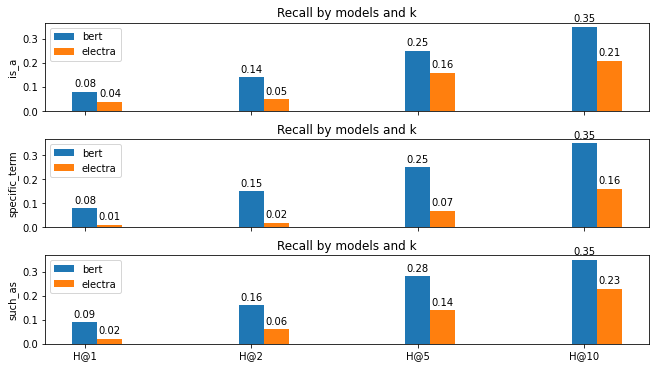

In [4]:
#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(18, 10))

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(9, 5))

width = 0.15  # the width of the bars

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

labels = ("H@1", "H@2", "H@5", "H@10") # ci sono i valori di k utilizzati

x = np.arange(len(labels))  # the label of precision

for (i, j) in enumerate([0, 1, 2]):    

    rects1 = axes[j].bar(x, recall_models[models[0]][i][1], width, label=models[0])
    axes[j].bar_label(rects1, padding=3)
    
    rects2 = axes[j].bar(x + width, precisions_models[models[1]][i][1], width, label=models[1])
    axes[j].bar_label(rects2, padding=3)

    #rects3 = axes[j].bar(x + 2*width, precisions_models[models[2]][i][1], width, label=models[2])
    #axes[j].bar_label(rects3, padding=3)

    #rects4 = axes[j, k].bar(x + 3*width, precisions_models[models[3]][i][1], width, label=models[3])
    #axes[j, k].bar_label(rects4, padding=3)
    


    #rects1 = ax.bar(x - width/2, men_means, width, label='')
    #rects2 = ax.bar(x + width/2, women_means, width, label='')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[j].set_ylabel(recall_models[models[0]][i][0])
    axes[j].set_title('Recall by models and k')
    axes[j].set_xticks(x, labels)
    axes[j].legend()


plt.show()

### MRR

In [5]:
table = Texttable()
table.set_cols_align(["m", "m", "m"])
table.add_row(["Experiment", "MRR-BERT", "MRR-ELECTRA"])

for (experiment, value_bert), (_, value_electra) in zip(mrr_models["bert"], mrr_models["electra"]):
    table.add_row([experiment, value_bert, value_electra])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------------+----------+-------------+
| Experiment    | MRR-BERT | MRR-ELECTRA |
+---------------+----------+-------------+
| is_a          | 0.130    | 0.060       |
+---------------+----------+-------------+
| specific_term | 0.140    | 0.040       |
+---------------+----------+-------------+
| such_as       | 0.130    | 0.090       |
+---------------+----------+-------------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|m|m|m|}
			\hline
			 \\
			\hline
			Experiment & MRR-BERT & MRR-ELECTRA \\
			\hline
			is_a & 0.130 & 0.060 \\
			\hline
			specific_term & 0.140 & 0.040 \\
			\hline
			such_as & 0.130 & 0.090 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


#### Other relations

Hyponyms

At location

Synonym

Used for

In [6]:
# Load the results

models = ["bert", "electra"]
kb = "cn"

relations = ["at_location", "hypo", "part_of", "synonym", "used_for"]

precisions_models = {}
recall_models = {}
mrr_models = {}

for model in models:
    main_folder = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}'

    precisions = []
    recalls = []
    mrrs = []

    for file in glob(main_folder+'/*.txt'):
        print(f'File: {file}')

        rel = ""

        for relation in relations:
            if relation in file:
                print(f'Relation: {relation}')
                rel = relation


        with open(file, 'r', encoding="utf8") as f:
            lines = f.readlines()

            precs_text = lines[:4]
            
            prec_rel_k = []
            for line in precs_text:
                split = line.strip().split(": ")
                prec_v = round(float(split[1]), 2)
                prec_rel_k.append(prec_v)


            recalls_text = lines[6:10]

            recall_rel_k = []
            for line in recalls_text:
                split = line.strip().split(": ")
                recall_v = round(float(split[1]), 2)
                recall_rel_k.append(recall_v)

            mrr_text = lines[18] # line is mrr
            split = mrr_text.strip().split(": ")
            mrr = round(float(split[1]), 2)


        precisions.append((rel, prec_rel_k))

        recalls.append((rel, recall_rel_k))

        mrrs.append((rel,mrr))

    precisions_models[model] = precisions
    recall_models[model] = recalls
    mrr_models[model] = mrrs


print(precisions_models)
print(recall_models)
print(mrr_models)



File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\masked_first_concept_at_location_20.txt
Relation: at_location
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\masked_first_concept_hypo_20.txt
Relation: hypo
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\masked_first_concept_part_of_20.txt
Relation: part_of
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\masked_first_concept_synonym_20.txt
Relation: synonym
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/cn\masked_first_concept_used_for_20.txt
Relation: used_for
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/cn\masked_first_concept_at_location_20.txt
Relation: at_location
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/cn\masked_first_concept_hypo_20.txt
Relation: hypo
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/cn\masked_first_concept_part_of_20.txt
Relation: part_of
File: /Users/1285

### PRECISION@k


In [7]:
table = Texttable()
table.set_cols_align(["l", "m", "m","m", "m", "m"])
table.add_row(["Model", "At_location", "Hyponym", "Part_of", "Synonym", "Used_for"])

for model in models:
    
    precs = precisions_models[model]

    row = []

    for prec in precs:
        row.append(prec[1][0])
    
    table.add_row([model.upper(), row[0], row[1], row[2], row[3], row[4]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------------+---------+---------+---------+----------+
| Model   | At_location | Hyponym | Part_of | Synonym | Used_for |
+---------+-------------+---------+---------+---------+----------+
| BERT    | 0.030       | 0.280   | 0.080   | 0.050   | 0.130    |
+---------+-------------+---------+---------+---------+----------+
| ELECTRA | 0.060       | 0.190   | 0.020   | 0.020   | 0.130    |
+---------+-------------+---------+---------+---------+----------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|m|m|m|m|}
			\hline
			 \\
			\hline
			Model & At_location & Hyponym & Part_of & Synonym & Used_for \\
			\hline
			BERT & 0.030 & 0.280 & 0.080 & 0.050 & 0.130 \\
			\hline
			ELECTRA & 0.060 & 0.190 & 0.020 & 0.020 & 0.130 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


### RECALL@k

In [8]:
table = Texttable()
table.set_cols_align(["l", "m", "m", "m", "m", "m"])
table.add_row(["Model", "At_location", "Hyponym", "Part_of", "Synonym", "Used_for"])

for model in models:
    
    recalls = recall_models[model]

    row = []

    for recall in recalls:
        row.append(recall[1][0])
    
    table.add_row([model.upper(), row[0], row[1], row[2], row[3], row[4]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------------+---------+---------+---------+----------+
| Model   | At_location | Hyponym | Part_of | Synonym | Used_for |
+---------+-------------+---------+---------+---------+----------+
| BERT    | 0.030       | 0.280   | 0.080   | 0.050   | 0.130    |
+---------+-------------+---------+---------+---------+----------+
| ELECTRA | 0.050       | 0.190   | 0.020   | 0.020   | 0.130    |
+---------+-------------+---------+---------+---------+----------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|m|m|m|m|}
			\hline
			 \\
			\hline
			Model & At_location & Hyponym & Part_of & Synonym & Used_for \\
			\hline
			BERT & 0.030 & 0.280 & 0.080 & 0.050 & 0.130 \\
			\hline
			ELECTRA & 0.050 & 0.190 & 0.020 & 0.020 & 0.130 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


### MRR

In [9]:
table = Texttable()
table.set_cols_align(["l", "m", "m", "m", "m", "m"])
table.add_row(["Model", "At_location", "Hyponym", "Part_of", "Synonym", "Used_for"])

for model in models:
    
    mrrs = mrr_models[model]

    row = []

    for mrr in mrrs:
        row.append(mrr[1])
    
    table.add_row([model.upper(), row[0], row[1], row[2], row[3], row[4]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------------+---------+---------+---------+----------+
| Model   | At_location | Hyponym | Part_of | Synonym | Used_for |
+---------+-------------+---------+---------+---------+----------+
| BERT    | 0.060       | 0.090   | 0.110   | 0.030   | 0.150    |
+---------+-------------+---------+---------+---------+----------+
| ELECTRA | 0.050       | 0.090   | 0.080   | 0.020   | 0.180    |
+---------+-------------+---------+---------+---------+----------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|m|m|m|m|}
			\hline
			 \\
			\hline
			Model & At_location & Hyponym & Part_of & Synonym & Used_for \\
			\hline
			BERT & 0.060 & 0.090 & 0.110 & 0.030 & 0.150 \\
			\hline
			ELECTRA & 0.050 & 0.090 & 0.080 & 0.020 & 0.180 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}
